## Starting of building Agentic flow


In [1]:
print("Lets get started!")

Lets get started!


In [4]:
import os

In [5]:
from dotenv import load_dotenv

In [6]:
load_dotenv()

True

In [7]:
import os
GROQ_API_KEY=os.getenv("GROQ_API_KEY")

In [8]:
os.environ["GROQ_API_KEY"]=GROQ_API_KEY

In [9]:
from langchain_groq import ChatGroq

In [10]:
model = ChatGroq(model = "deepseek-r1-distill-llama-70b")

In [8]:
state={}

In [ ]:
state

{}

In [10]:
state["messages"]=[]

In [11]:
state["messages"].append("hi")

In [12]:
state

{'messages': ['hi']}

In [3]:
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage
from typing import Annotated, Literal, TypedDict
from langchain_core.messages import AnyMessage
from IPython.display import Image,display
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

In [2]:
class agenticState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

NameError: name 'TypedDict' is not defined

In [ ]:
model.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 6, 'total_tokens': 22, 'completion_time': 0.058181818, 'prompt_time': 0.003642338, 'queue_time': 0.120120484, 'total_time': 0.061824156}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'stop', 'logprobs': None}, id='run-b76f6530-9778-45b1-a8a5-7cfcfaa92e73-0', usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22})

In [ ]:
def call_model(state:agenticState):
    question=state["messages"]
    response=model.invoke(question)
    return {"messages":[response]}




In [18]:
workflow = StateGraph(agenticState)

In [19]:
workflow.add_node("Assistant", call_model)

In [20]:
workflow.add_edge(START, "Assistant")

In [21]:
workflow.add_edge("Assistant",END)

In [22]:
app = workflow.compile()

In [43]:
from IPython.display import Image,display

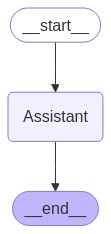

In [24]:
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
input={"messages":["hi my name is uzair"]}

In [26]:

response = app.invoke(input)

In [27]:
response['messages'][-1].content

'<think>\n\n</think>\n\nHi Uzair! How can I assist you today?'

In [28]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from Assistant Node
_______
{'messages': [AIMessage(content='<think>\n\n</think>\n\nHi Uzair! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 9, 'total_tokens': 27, 'completion_time': 0.065454545, 'prompt_time': 0.003542081, 'queue_time': 0.209105273, 'total_time': 0.068996626}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'stop', 'logprobs': None}, id='run-99af03dc-ca86-48dc-a228-5000dbdf5e62-0', usage_metadata={'input_tokens': 9, 'output_tokens': 18, 'total_tokens': 27})]}




In [16]:
@tool
def calculator(a:int,b:int)->int:
    """ Multiply a and b """
    return a*b

In [17]:
@tool
def chatbot(query:str):
    """provide answer of the query through llm"""
    return model.invoke(query)

In [18]:
@tool
def add(a:int,b:int)->int:
    """add both a and b"""
    return a+b

In [19]:
@tool
def subtract(a:int,b:int)->int:
    """subtract both a and b"""
    return a-b

In [20]:
@tool
def divide(a:int,b:int)->int:
    """divide both a and b"""
    return a/b

In [21]:
from langchain_community.tools import DuckDuckGoSearchRun


In [22]:
Duck_Duck_search = DuckDuckGoSearchRun()

In [23]:
@tool
def generate(query:str):
    """Generate important quiz question from the topic asked"""
    return model.invoke(query)
    

In [19]:
print(generate.invoke("generate me 2 questions in machine learning topic for paper"))

content="<think>\nOkay, so the user has asked me to generate two questions in the machine learning topic for a paper. Hmm, I need to come up with relevant and current topics that would make for good research papers. Let me think about what's hot in ML right now.\n\nFirst, explainability is a big deal. People are using more complex models like deep learning, but they're black boxes. So a question about interpretability could be really useful. That makes sense because as AI becomes more integrated into critical areas, understanding how models make decisions is crucial.\n\nNext, generalization. It's a fundamental issue because models often struggle with out-of-distribution data. Adversarial attacks are also a real problem, especially in security-sensitive applications. Combining these aspects could lead to some interesting research on robustness.\n\nI should frame these questions to be broad enough for a paper but specific enough to guide the research. Maybe the first question focuses on 

In [26]:
tools = [calculator,add,subtract,divide,generate]

In [27]:
tools 

[StructuredTool(name='calculator', description='Multiply a and b', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x00000284408A6520>),
 StructuredTool(name='add', description='add both a and b', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002844374B2E0>),
 StructuredTool(name='subtract', description='subtract both a and b', args_schema=<class 'langchain_core.utils.pydantic.subtract'>, func=<function subtract at 0x0000028445FD4D60>),
 StructuredTool(name='divide', description='divide both a and b', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000284436EBF60>),
 StructuredTool(name='generate', description='Generate important quiz question from the topic asked', args_schema=<class 'langchain_core.utils.pydantic.generate'>, func=<function generate at 0x000002844600AD40>)]

In [28]:
llm_tools = model.bind_tools(tools)

In [29]:
result = llm_tools.invoke("generate me 2 questions in machine learning tpic for paper")

In [30]:
result.tool_calls

[]

In [31]:
from langchain_core.messages import SystemMessage,HumanMessage

In [32]:
sys_msg = SystemMessage(content= "you are an AI assistant which can do arithmatic operation and generation and also question answering tasks")


In [34]:
def assistant(state:MessagesState):
    return {"messages":[llm_tools.invoke([sys_msg]+state["messages"])]}

In [35]:
builder=StateGraph(MessagesState)

In [36]:
builder.add_node("assistant",assistant)

In [37]:
builder.add_node("tools",ToolNode(tools))

In [38]:
builder.add_edge(START,"assistant")

In [39]:

from langgraph.prebuilt import tools_condition

In [40]:
builder.add_conditional_edges(
    "assistant",
    tools_condition
)

In [41]:
react_app=builder.compile()

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

NameError: name 'Image' is not defined

In [36]:
builder.add_edge("tools","assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [37]:
react_app=builder.compile()

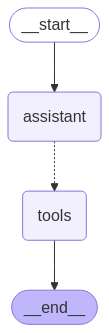

In [44]:
display(Image(react_app.get_graph().draw_mermaid_png()))

## lANGGRAPH-> mEMORY SAVER, hUMAN IN LOOP

## 2- Multi agents

In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from IPython.display import Image,display

In [2]:
class agentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [3]:
def invoke_model(state:agentState):
    pass

In [4]:
def invoke_tool(state:agentState):
    pass

In [5]:
def router(state:agentState):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"
     

In [22]:
graph = StateGraph(agentState)

In [23]:
graph.add_node("AI_assistant",invoke_model)
graph.add_node("tool", invoke_tool)

In [24]:
graph.add_conditional_edges(
    "AI_assistant",
    router,
    {"tool":"tool","end":END}
)

In [25]:
# graph.add_edge("tool", END)
graph.add_edge("tool" , "AI_assistant")
graph.set_entry_point("AI_assistant")

In [26]:
app = graph.compile()

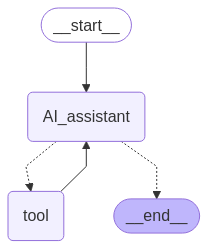

In [27]:
display(Image(app.get_graph().draw_mermaid_png()))

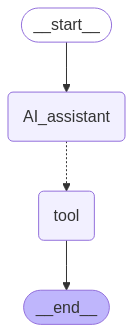

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))